In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [78]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

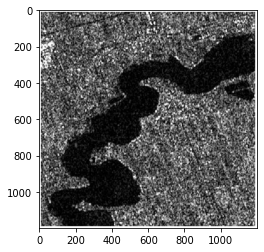

In [5]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [52]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

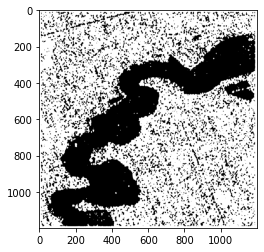

In [53]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [7]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

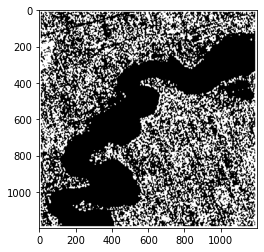

In [8]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [42]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


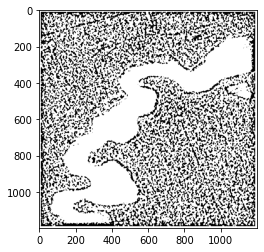

In [43]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [55]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

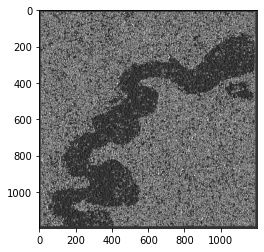

In [57]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

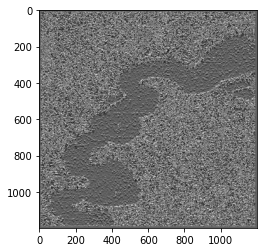

In [58]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [60]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

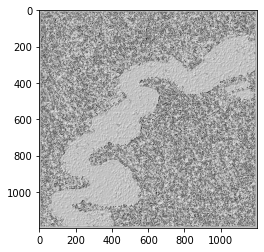

In [62]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [64]:
edges = cv2.Canny(image_gray,100,200)

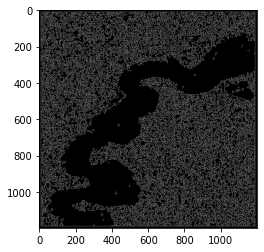

In [65]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [127]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

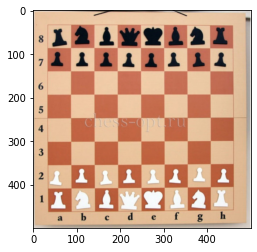

In [128]:
plt.imshow(image)

In [138]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [146]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [147]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

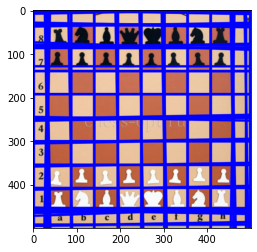

In [148]:
plt.imshow(image)

In [149]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.